In [2]:
import numpy as np
import matplotlib.pyplot as plt

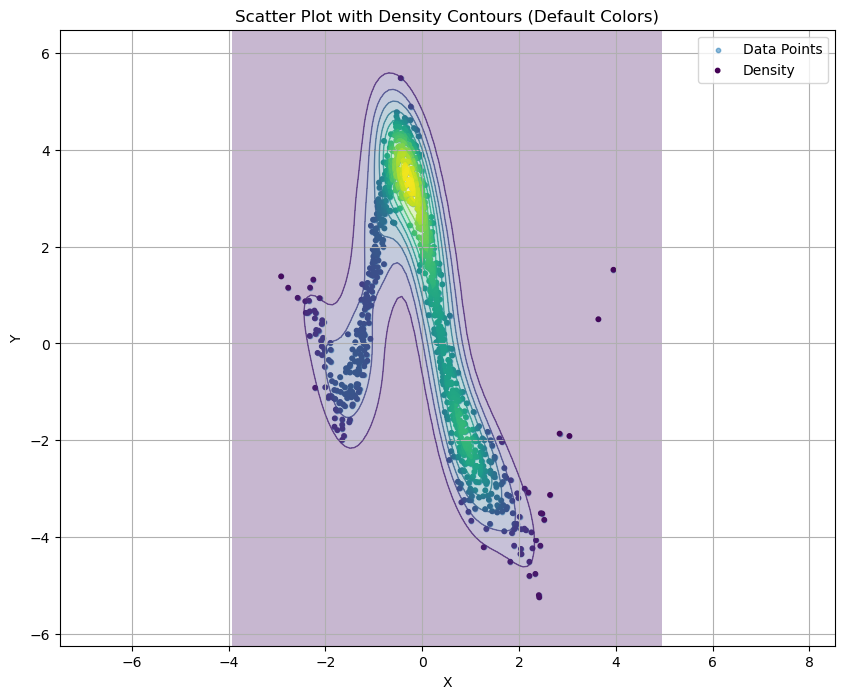

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

def generate_f_x(x, num_basis=10, weight_dist=(1, 0.5), freq_dist=(0.5, 3)):
    """
    Generate a complex nonlinear function f(x) composed of multiple sinusoidal basis functions.

    Parameters:
        x (np.ndarray): Input array.
        num_basis (int): Number of sinusoidal basis functions.
        weight_dist (tuple): Mean and standard deviation for weights.
        freq_dist (tuple): Range (min, max) for frequencies.

    Returns:
        np.ndarray: Output array after applying f(x).
    """
    weights = np.random.normal(loc=weight_dist[0], scale=weight_dist[1], size=num_basis)
    frequencies = np.random.uniform(low=freq_dist[0], high=freq_dist[1], size=num_basis)
    phases = np.random.uniform(low=0, high=2*np.pi, size=num_basis)
    
    f_x = np.zeros_like(x)
    for w, f, phi in zip(weights, frequencies, phases):
        f_x += w * np.sin(f * x + phi)
    return f_x

def generate_data(N=1000, num_basis=10, noise_std=0.5):
    """
    Generate dataset based on Y = f(X) + e.

    Parameters:
        N (int): Number of samples.
        num_basis (int): Number of sinusoidal basis functions in f(x).
        noise_std (float): Standard deviation of Gaussian noise e.

    Returns:
        tuple: Arrays of X and Y.
    """
    # Step 1: Sample X from a standard Gaussian distribution
    X = np.random.normal(loc=0, scale=1, size=N)
    
    # Step 2: Compute f(X)
    f_x = generate_f_x(X, num_basis=num_basis)
    
    # Step 3: Sample e from Gaussian noise
    e = np.random.normal(loc=0, scale=noise_std, size=N)
    
    # Step 4: Compute Y = f(X) + e
    Y = f_x + e
    
    return X, Y

def plot_data_with_contours(X, Y, bins=100):
    """
    Plot scatter of (X, Y) and overlay density contours using default color schemes.

    Parameters:
        X (np.ndarray): Array of X values.
        Y (np.ndarray): Array of Y values.
        bins (int or tuple): Number of bins for histogram.
    """
    plt.figure(figsize=(10, 8))
    
    # Scatter plot of data points with default color
    plt.scatter(X, Y, s=10, alpha=0.5, label='Data Points')
    
    # Perform Kernel Density Estimation
    xy = np.vstack([X, Y])
    kde = gaussian_kde(xy)(xy)
    
    # Sort the points by density, so that the densest points are plotted on top
    idx = kde.argsort()
    X_sorted, Y_sorted, kde_sorted = X[idx], Y[idx], kde[idx]
    
    # Scatter plot colored by density using default colormap
    plt.scatter(X_sorted, Y_sorted, c=kde_sorted, s=10, cmap=None, label='Density')  # Removed 'cmap' parameter
    
    # Create a grid for contour plotting
    xmin, xmax = X.min() - 1, X.max() + 1
    ymin, ymax = Y.min() - 1, Y.max() + 1
    xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([xx.ravel(), yy.ravel()])
    
    # Compute the KDE on grid
    zz = gaussian_kde(xy)(positions).reshape(xx.shape)
    
    # Plot contour lines using default color (usually blue)
    contour_levels = 10
    plt.contour(xx, yy, zz, levels=contour_levels, linewidths=1, alpha=0.7)
    
    # Optionally, fill contours with default colormap
    plt.contourf(xx, yy, zz, levels=contour_levels, alpha=0.3)  # Removed 'cmap' parameter
    
    plt.title('Scatter Plot with Density Contours (Default Colors)')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)
    plt.axis('equal')  # Equal scaling for both axes
    plt.show()

def main():
    # Parameters
    N = 1000  # Number of samples
    num_basis = 10  # Number of sinusoidal basis functions
    noise_std = 0.5  # Standard deviation of Gaussian noise
    
    # Generate data
    X, Y = generate_data(N=N, num_basis=num_basis, noise_std=noise_std)
    
    # Plot data with density contours
    plot_data_with_contours(X, Y, bins=100)

if __name__ == "__main__":
    main()

/tmp/ipykernel_3389222/3947312413.py:96: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)  # Hides the legend


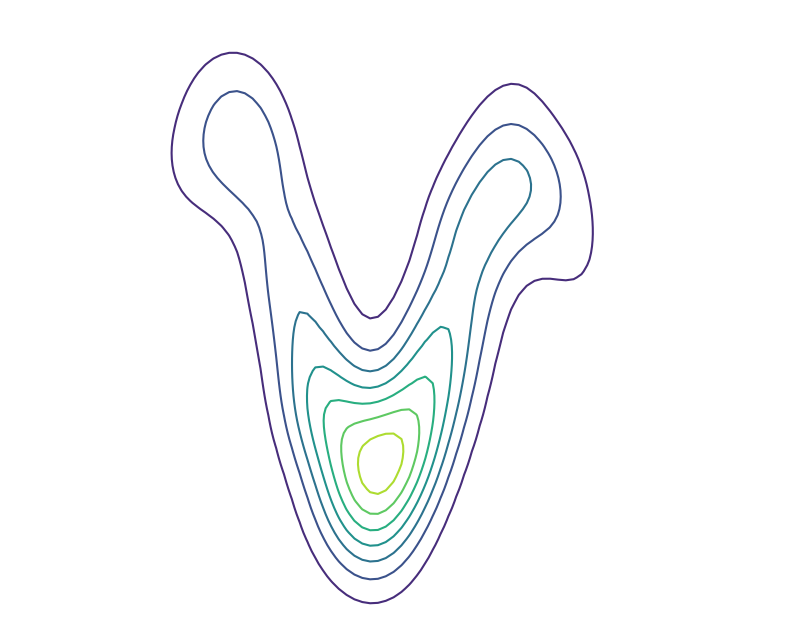

In [302]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

def generate_f_x(x, num_basis=10, weight_dist=(1, 0.5), freq_dist=(0.5, 3)):
    """
    Generate a complex nonlinear function f(x) composed of multiple sinusoidal basis functions.

    Parameters:
        x (np.ndarray): Input array.
        num_basis (int): Number of sinusoidal basis functions.
        weight_dist (tuple): Mean and standard deviation for weights.
        freq_dist (tuple): Range (min, max) for frequencies.

    Returns:
        np.ndarray: Output array after applying f(x).
    """
    weights = np.random.normal(loc=weight_dist[0], scale=weight_dist[1], size=num_basis)
    frequencies = np.random.uniform(low=freq_dist[0], high=freq_dist[1], size=num_basis)
    phases = np.random.uniform(low=0, high=2*np.pi, size=num_basis)
    
    f_x = np.zeros_like(x)
    for w, f, phi in zip(weights, frequencies, phases):
        f_x += w * np.sin(f * x + phi)
    return f_x

def generate_data(N=1000, num_basis=10, noise_std=0.5):
    """
    Generate dataset based on Y = f(X) + e.

    Parameters:
        N (int): Number of samples.
        num_basis (int): Number of sinusoidal basis functions in f(x).
        noise_std (float): Standard deviation of Gaussian noise e.

    Returns:
        tuple: Arrays of X and Y.
    """
    # Step 1: Sample X from a standard Gaussian distribution
    X = np.random.normal(loc=0, scale=1, size=N)
    
    # Step 2: Compute f(X)
    f_x = generate_f_x(X, num_basis=num_basis)
    
    # Step 3: Sample e from Gaussian noise
    e = np.random.normal(loc=0, scale=noise_std, size=N)
    
    # Step 4: Compute Y = f(X) + e
    Y = f_x + e
    
    return X, Y

def plot_data_with_contours(X, Y, bins=100):
    """
    Plot scatter of (X, Y) and overlay density contours using default color schemes.

    Parameters:
        X (np.ndarray): Array of X values.
        Y (np.ndarray): Array of Y values.
        bins (int or tuple): Number of bins for histogram.
    """
    plt.figure(figsize=(10, 8))
    
    # Scatter plot of data points with default color
    #plt.scatter(X, Y, s=10, alpha=0.5, label='Data Points', color = "grey")
    
    # Perform Kernel Density Estimation
    xy = np.vstack([X, Y])
    kde = gaussian_kde(xy)(xy)
    
    # Sort the points by density, so that the densest points are plotted on top
    idx = kde.argsort()
    X_sorted, Y_sorted, kde_sorted = X[idx], Y[idx], kde[idx]
    
    # Scatter plot colored by density using default colormap
    #scatter = plt.scatter(X_sorted, Y_sorted, c=kde_sorted, s=10, cmap='viridis', label='Density')
    
    # Create a grid for contour plotting
    xmin, xmax = X.min() - 1, X.max() + 1
    ymin, ymax = Y.min() - 1, Y.max() + 1
    xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([xx.ravel(), yy.ravel()])
    
    # Compute the KDE on grid
    zz = gaussian_kde(xy)(positions).reshape(xx.shape)
    
    # Plot contour lines using default color (usually blue)
    contour_levels = 8
    plt.contour(xx, yy, zz, levels=contour_levels, linewidths=1.5, alpha=1.0)
    
    # Remove filled contours to eliminate shaded regions
    # plt.contourf(xx, yy, zz, levels=contour_levels, alpha=0.3)  # Removed
    
    # Remove axes, ticks, labels, and legend
    plt.axis('off')  # Hides the axes
    plt.legend().set_visible(False)  # Hides the legend
    plt.savefig("dist_plot", bbox_inches = "tight")
    plt.show()

def main():
    # Parameters
    N = 1000          # Number of samples
    num_basis = 10    # Number of sinusoidal basis functions
    noise_std = 2.0   # Standard deviation of Gaussian noise
    
    # Generate data
    X, Y = generate_data(N=N, num_basis=num_basis, noise_std=noise_std)
    
    # Plot data with density contours
    plot_data_with_contours(X, Y, bins=100)
    
if __name__ == "__main__":
    main()